In [194]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime as dt

%matplotlib inline

In [195]:
weather_data = pd.read_csv('weather_data_.csv')

In [196]:
weather_data

,time,date,tempC,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,weatherDesc,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,pressureInches,cloudcover,WindGustMiles,WindGustKmph,uvIndex
0,0,1/1/2019,9,6,10,272,W,122,Overcast,0.0,0.0,78,10,6,1035,31,100,10,15,1
1,300,1/1/2019,8,7,11,278,W,116,Partly cloudy,0.0,0.0,85,10,6,1034,31,34,10,17,1
2,600,1/1/2019,7,8,12,284,WNW,113,Sunny,0.0,0.0,88,10,6,1034,31,25,11,18,3
3,900,1/1/2019,7,8,13,294,WNW,116,Partly cloudy,0.0,0.0,88,10,6,1034,31,38,13,20,3
4,1200,1/1/2019,9,9,15,320,NW,116,Partly cloudy,0.0,0.0,81,10,6,1035,31,57,13,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,900,12/31/2021,12,14,23,206,SSW,122,Overcast,0.0,0.0,82,10,6,1017,30,92,21,35,3
8764,1200,12/31/2021,13,13,21,226,SW,122,Overcast,0.0,0.0,82,10,6,1019,30,100,18,29,3
8765,1500,12/31/2021,14,12,19,227,SW,116,Partly cloudy,0.0,0.0,81,10,6,1019,30,59,17,28,4
8766,1800,12/31/2021,12,13,20,227,SW,116,Partly cloudy,0.0,0.0,90,10,6,1020,30,32,20,32,1


In [197]:
#check the format of date
weather_data.dtypes

time                 int64
date                object
tempC                int64
windspeedMiles       int64
windspeedKmph        int64
winddirDegree        int64
winddir16Point      object
weatherCode          int64
weatherDesc         object
precipMM           float64
precipInches       float64
humidity             int64
visibility           int64
visibilityMiles      int64
pressure             int64
pressureInches       int64
cloudcover           int64
WindGustMiles        int64
WindGustKmph         int64
uvIndex              int64
dtype: object

#### cloudcover: 
Refers to the fraction of the sky obscured by clouds when observed from a particular location

In [198]:
#returns the time format HH:MM:SS of a given string
def time_to_string(x):
    if x == 0:
        return '00:00:00'
    x = str(x)
    if len(x) == 3:
        return "0" + x[0:1] + ":" + x[1:3] +":00"
    else:
        return x[0:2] + ":" + x[2:4] +":00"

In [199]:
#change the format of the string to time format
weather_data['time'] = weather_data['time'].apply(time_to_string)

In [200]:
#change the date format and convert to string format
weather_data["date"] = pd.to_datetime(weather_data.date)
weather_data["date"] = weather_data["date"].dt.strftime('%Y-%m-%d')

In [201]:
#concat date, time columns into a single column
weather_data.insert(loc=0, column='datetime', value=weather_data["date"] + " " + weather_data["time"])
weather_data = weather_data.drop(['date', 'time'],  axis=1)

In [202]:
#checking for missing values
missing_values = weather_data.isnull().sum()
missing_values

datetime           0
tempC              0
windspeedMiles     0
windspeedKmph      0
winddirDegree      0
winddir16Point     0
weatherCode        0
weatherDesc        0
precipMM           0
precipInches       0
humidity           0
visibility         0
visibilityMiles    0
pressure           0
pressureInches     0
cloudcover         0
WindGustMiles      0
WindGustKmph       0
uvIndex            0
dtype: int64

#### Comment:
No missing values in the data

## EDA

#### Heat Map
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale

<AxesSubplot:>

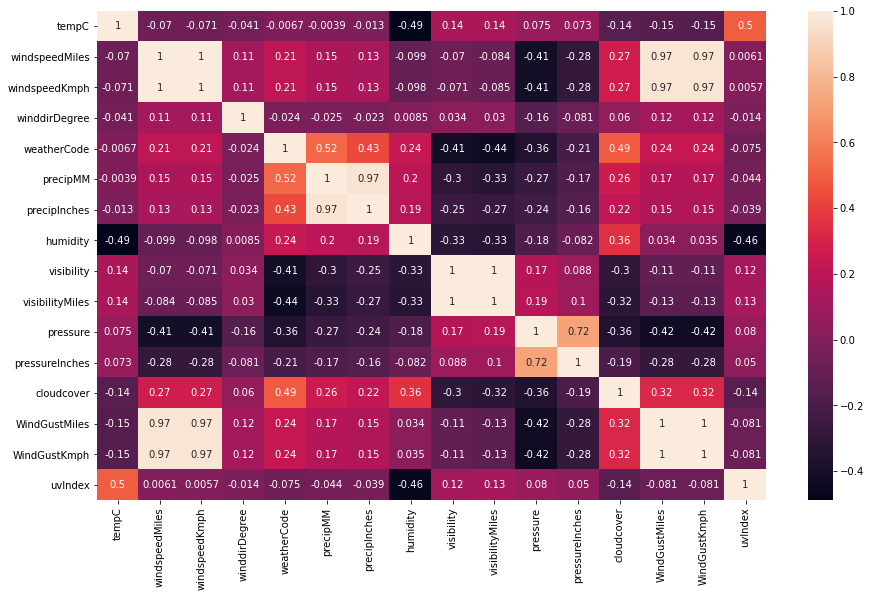

In [203]:
weather_corr = weather_data.corr()
## increasing the plot figure size to see the correlation coefficient values clearly
plt.subplots(figsize=(15, 9))
sns.heatmap(weather_corr, annot=True)

### Comment:
1) tempC and uvIndex are positively correlated. <br>
2) tempC and humidity are negatively correlated. <br>
    But, the amount of UV radiation that reaches the earth on any given day is not affected by air temperature.(According to domain research)<br><br>
3) windspeedMiles, windspeedKmph have similar correlation values (obviously), one of them can be eliminated. <br>
    It's the samecase with WindGustMiles, WindGustKmph & visibility, visibilityMiles. <br>
4) Keeping the pressureInches column and dropping the actual pressure in millibars column because small numbers are easier to look at!  <br>


#### Since weatherCode, weatherDesc cols seem to have repeating values, so, I decided to check whether they are categorical in anyway

In [204]:
len(weather_data.weatherCode.unique())

37

In [205]:
len(weather_data.weatherDesc.unique())

38

In [206]:
weather_data.weatherCode.value_counts()

116    3094
113    1308
122    1238
119     808
176     592
353     547
296     272
266     255
302     178
143     121
356      49
248      40
308      35
338      34
293      33
263      30
299      27
200      14
317      12
389      10
332      10
311       7
326       7
371       7
305       6
386       5
182       4
362       4
329       4
335       4
323       3
359       3
230       2
368       2
395       1
227       1
320       1
Name: weatherCode, dtype: int64

In [207]:
weather_data.weatherDesc.value_counts()

Partly cloudy                          3094
Overcast                               1238
Cloudy                                  808
Clear                                   684
Sunny                                   624
Patchy rain possible                    592
Light rain shower                       547
Light rain                              272
Light drizzle                           255
Moderate rain                           178
Mist                                    121
Moderate or heavy rain shower            49
Fog                                      40
Heavy rain                               35
Heavy snow                               34
Patchy light rain                        33
Patchy light drizzle                     30
Moderate rain at times                   27
Thundery outbreaks possible              14
Light sleet                              12
Moderate snow                            10
Moderate or heavy rain with thunder      10
Light snow                      

### I love this! 
count(weatherCode['113']= 1308 = count(weatherDesc['Clear']) + count(weatherCode['Sunny']) and counts of the rest of the values are matching too!!!<br>

This means weatherDesc and weatherCode are similar columns. Thus, one of them can be ignored. Since, weatherDesc is more specific, I decided to drop the weatherCode col.

In [208]:
weather_data = weather_data.drop(['windspeedMiles', 'WindGustMiles', 'visibilityMiles', 'pressure', 'weatherCode'], axis=1)

#### Finally brought down the dimensions of the dataset from 20 to 14 cols!!